In [1]:
# EDA 사전 세팅
%matplotlib inline

import os
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
sns.set(font="AppleGothic", 

        rc={"axes.unicode_minus":False},

        style='darkgrid')

In [74]:
df = pd.read_csv("/Users/choejeehyuk/Desktop/DNA/open/train.csv")
df.head(10)
df_test = pd.read_csv("/Users/choejeehyuk/Desktop/DNA/open/test.csv")

In [75]:
df.drop(['FLAG_MOBIL'], axis=1, inplace=True)
df_test.drop(['FLAG_MOBIL'], axis=1, inplace=True)

In [76]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

In [77]:
feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    df[feat]=np.abs(df[feat])
    df_test[feat]=np.abs(df_test[feat])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [68]:
df.isnull().sum() 

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
new_age             0
근속연수                0
근속월수                0
임용 월                0
임용 주                0
고용전 날 수             0
고용비율                0
인당 평균 부양비           0
연봉                  0
dtype: int64

In [79]:
df.fillna('NaN', inplace=True)
df_test.fillna('NaN', inplace=True)

In [80]:
df.isnull().sum() 

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [31]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
count,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00
mean,13228.00,0.43,187306.52,15958.05,2198.53,0.22,0.29,0.09,2.20,26.12,1.52
std,7637.62,0.75,101878.37,4201.59,2370.14,0.42,0.46,0.29,0.92,16.56,0.70
min,0.00,0.00,27000.00,7705.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,6614.00,0.00,121500.00,12446.00,407.00,0.00,0.00,0.00,2.00,12.00,1.00
50%,13228.00,0.00,157500.00,15547.00,1539.00,0.00,0.00,0.00,2.00,24.00,2.00
75%,19842.00,1.00,225000.00,19431.00,3153.00,0.00,1.00,0.00,3.00,39.00,2.00
max,26456.00,19.00,1575000.00,25152.00,15713.00,1.00,1.00,1.00,20.00,60.00,2.00


In [32]:
df['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [33]:
df['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [34]:
df['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [35]:
df['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

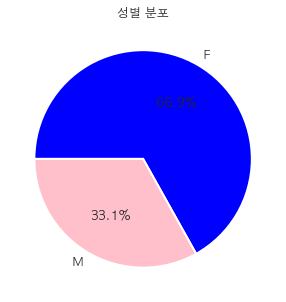

In [36]:
df1= df.groupby('gender').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('성별 분포')
plt.show()

# 여성이 두배 더 많음 

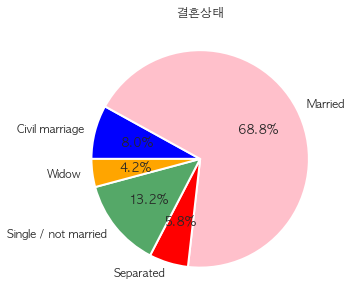

In [213]:
df1= df.groupby('family_type').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('결혼상태')
plt.show()

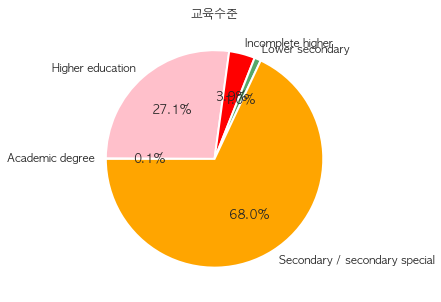

In [214]:
df1= df.groupby('edu_type').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('교육수준')
plt.show()

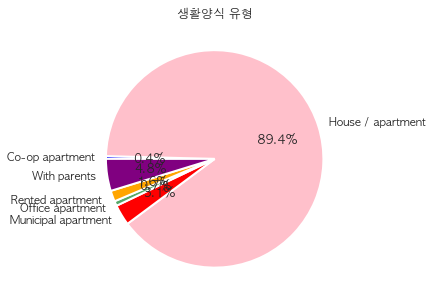

In [216]:
df1= df.groupby('house_type').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('생활양식 유형')
plt.show()

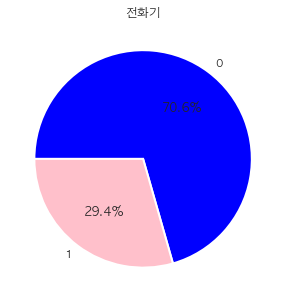

In [224]:
df1= df.groupby('phone').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('전화기')
plt.show()

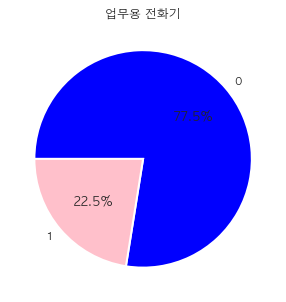

In [223]:
df1= df.groupby('work_phone').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('업무용 전화기')
plt.show()

Text(0.5, 1.0, '가족 규모')

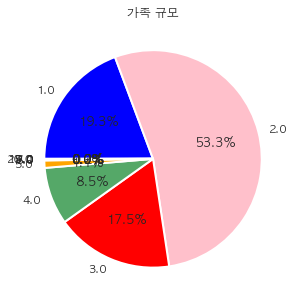

In [222]:
df1= df.groupby('family_size').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('가족 규모')

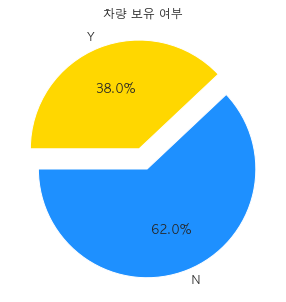

In [229]:
df1= df.groupby('car').count()['index']
explode = (0.1, 0.1)
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['dodgerblue','gold'],explode=explode, startangle=180,autopct='%1.1f%%')
plt.title('차량 보유 여부')
plt.show()

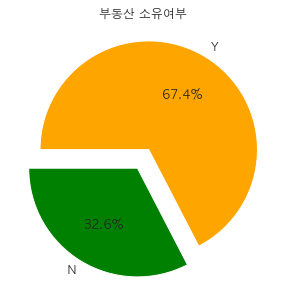

In [28]:
df1= df.groupby('reality').count()['index']
explode = (0.1, 0.1)
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['green','orange'],explode=explode, startangle=180,autopct='%1.1f%%')
plt.title('부동산 소유여부')
plt.show()

# 부동산을 소유한 사람이 2배 더 많다.부자가 많구나?!!
# 부동산이 있는데 차가 없다??? 한번 봐야 할듯 오히려 차 없는 사람이 대부분

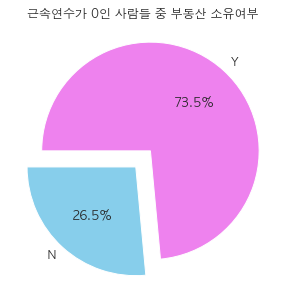

In [34]:
df1= No_job_reality_Y.groupby('reality').count()['index']
explode = (0.1, 0.1)
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','violet'],explode=explode, startangle=180,autopct='%1.1f%%')
plt.title('근속연수가 0인 사람들 중 부동산 소유여부')
plt.show()

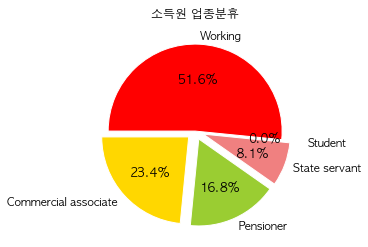

In [31]:
explode = (0.1, 0.1, 0.1, 0.2, 0.0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
plt.pie(it,explode=explode,colors=colors, labels=it.index, startangle=180,autopct='%1.1f%%',textprops={'color':"black"})
title_color = 'black'
plt.title('소득원 업종분류',color=title_color)
plt.show()

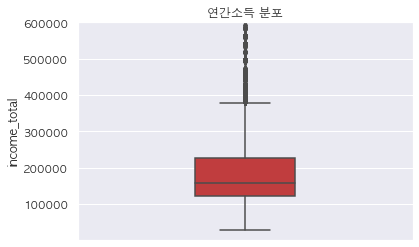

In [24]:
sns.boxplot(data=df,y="income_total", width=0.3, color='tab:red')
plt.title('연간소득 분포')
plt.ylim(1000, 600000)
plt.show()

In [82]:
# 나이 만들기
df['new_age'] = round(abs(df['DAYS_BIRTH'])/365.5,0).astype(np.int32)
df_test['new_age'] = round(abs(df_test['DAYS_BIRTH'])/365.5,0).astype(np.int32)
df.head(2)
df_test.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,new_age
0,26457,M,Y,N,0,112500.00,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,21990,0,0,1,0,NaN,2.00,60.00,60
1,26458,F,N,Y,0,135000.00,State servant,Higher education,Married,House / apartment,18964,8671,0,1,0,Core staff,2.00,36.00,52


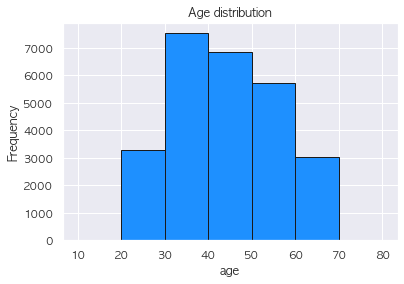

In [84]:
df['new_age'].plot.hist(bins=range(10,81,10),color='dodgerblue', edgecolor='k')
plt.xlabel('age')
plt.title('Age distribution')
plt.show()
# 30 40 50대가 주축 확실히 경제활동인구가 많음

In [39]:
sex = df.groupby('gender')
M_group= sex.get_group('M')
F_group= sex.get_group('F')
M = M_group['new_age']
F = F_group['new_age']

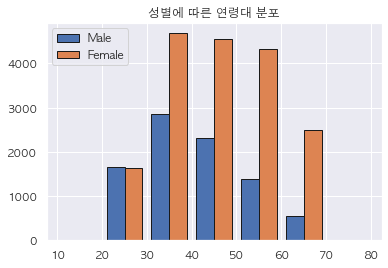

In [40]:
plt.hist([M,F], bins=range(10,81,10), label=['Male', 'Female'],edgecolor='k')
plt.legend(loc='upper left')
plt.title('성별에 따른 연령대 분포')
plt.show()

In [35]:
it = df.groupby('income_type').count()['index']
it = it.reset_index()
it

,income_type,index
0,Commercial associate,6202
1,Pensioner,4449
2,State servant,2154
3,Student,7
4,Working,13645


pensioner는 연금 수령자이며 대부분은 노동자이다.

In [43]:
et = df.groupby('edu_type').count()['index']
et = et.reset_index()
et

,edu_type,index
0,Academic degree,23
1,Higher education,7162
2,Incomplete higher,1020
3,Lower secondary,257
4,Secondary / secondary special,17995


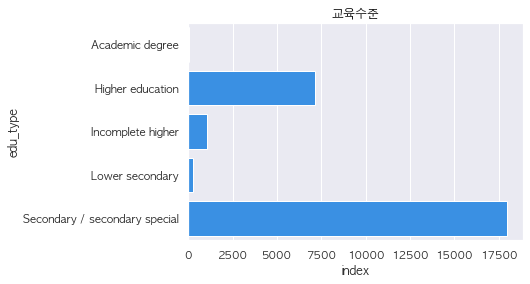

In [44]:
sns.barplot(data=et, y="edu_type", x="index", orient='h',color='dodgerblue')
title_color = 'black'
plt.title('교육수준',color=title_color)
plt.show()

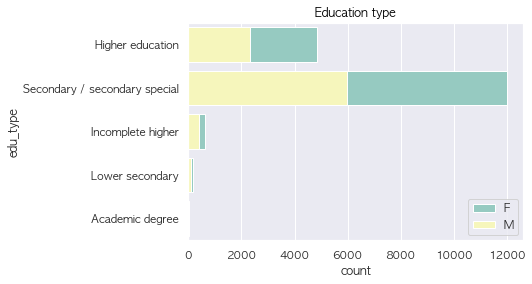

In [45]:
# 누적합
sns.countplot(data=df, y="edu_type",hue='gender', palette='Set3',dodge=False)
plt.legend(loc='lower right')
title_color = 'black'
plt.title('Education type',color=title_color)
plt.show()

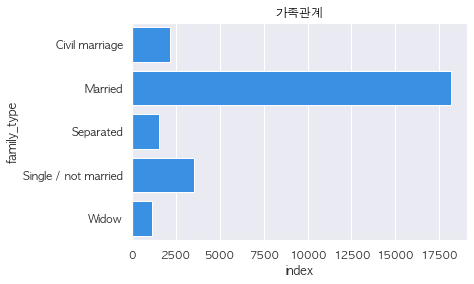

In [88]:
ft = df.groupby('family_type').count()['index']
ft = ft.reset_index()

sns.barplot(data=ft, y="family_type", x="index", orient='h',color='dodgerblue')
title_color = 'black'
plt.title('가족관계',color=title_color)
plt.show()

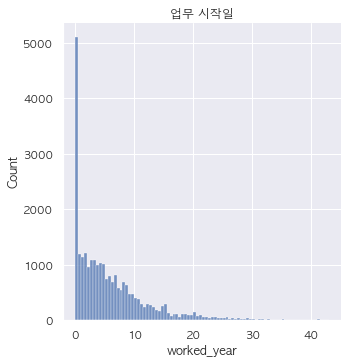

In [52]:
df['worked_year'] = [0 if s >=0 else round(abs(s)/365.5,2) for s in df['DAYS_EMPLOYED']]
sns.displot(data=df,x="worked_year",kind='hist')
plt.title('업무 시작일')
plt.show()

In [ ]:
# 결혼을 했는데 일을 안한다.?
# 부동산이 있어서 일을 안한다는 가능 / 여성이 대부분 이라서? / 일단 조금 더 살펴볼 필요 유

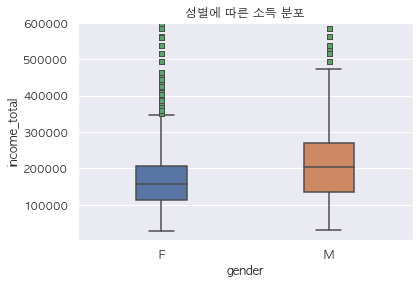

In [58]:
green = dict(markerfacecolor='g', marker='s')
sns.boxplot(data=df,y="income_total",x='gender', width=0.3,flierprops=green)
plt.title('성별에 따른 소득 분포')
plt.ylim(2000, 600000)
plt.show()

In [43]:
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age,근속연수,임용 월,임용 주,고용전 날 수,고용비율,인당 평균 부양비,연봉,신용카드 발급 월
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0,38,12,0.0,0.0,9190,0.338801,101250.0,16875.0,0.50
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,31,4,3.0,0.0,9840,0.135325,82500.0,61875.0,0.42
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,52,12,3.0,1.0,14653,0.232305,225000.0,37500.0,1.83
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,41,5,9.0,2.0,12996,0.138653,101250.0,40500.0,3.08
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,41,5,10.0,0.0,12932,0.139988,78750.0,31500.0,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4.0,2.0,1.0,33,5,6.0,3.0,10095,0.164252,56250.0,45000.0,0.17
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,NaN,2.0,47.0,2.0,42,6,10.0,1.0,12816,0.161860,90000.0,30000.0,3.92
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2.0,25.0,2.0,28,5,7.0,3.0,8067,0.199861,146250.0,58500.0,2.08
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1.0,59.0,2.0,28,0,3.0,3.0,10038,0.010547,171000.0,inf,4.92


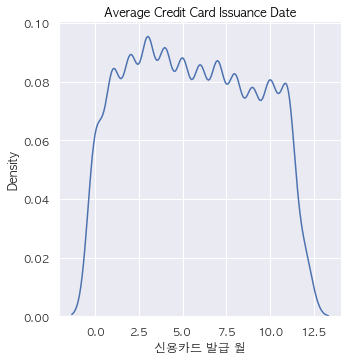

In [48]:
# 신용카드 발급 월(begin_month) 데이터 시각화
df['신용카드 발급 월'] = [s if s <= 12 else round(abs(s)%12, 0) for s in df['begin_month']]

sns.displot(data=df,x='신용카드 발급 월',kind='kde')
title_color = 'black'
plt.title('Average Credit Card Issuance Date',color=title_color)
plt.show()

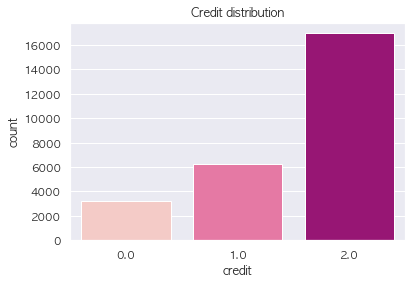

In [21]:
sns.countplot(data=df, x="credit",palette="RdPu")
plt.title('Credit distribution')
plt.show()
# 0일 수록 고신용자

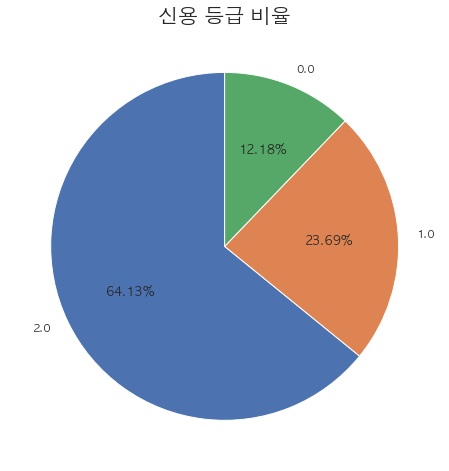

In [83]:
plt.subplots(figsize = (8,8))
plt.pie(df['credit'].value_counts(), labels = df['credit'].value_counts().index, 
        autopct="%.2f%%", startangle = 90)
plt.title('신용 등급 비율', size=20)
plt.show()

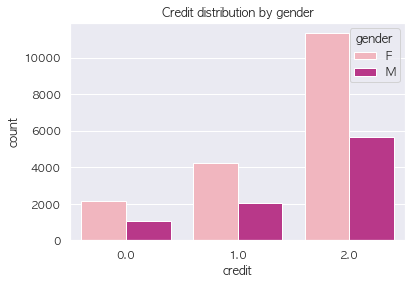

In [60]:
sns.countplot(data=df, x="credit",hue='gender',palette="RdPu")
plt.title('Credit distribution by gender')
plt.show()


[Text(0, 0, 'NaN'), Text(1, 0, 'Sales staff')]

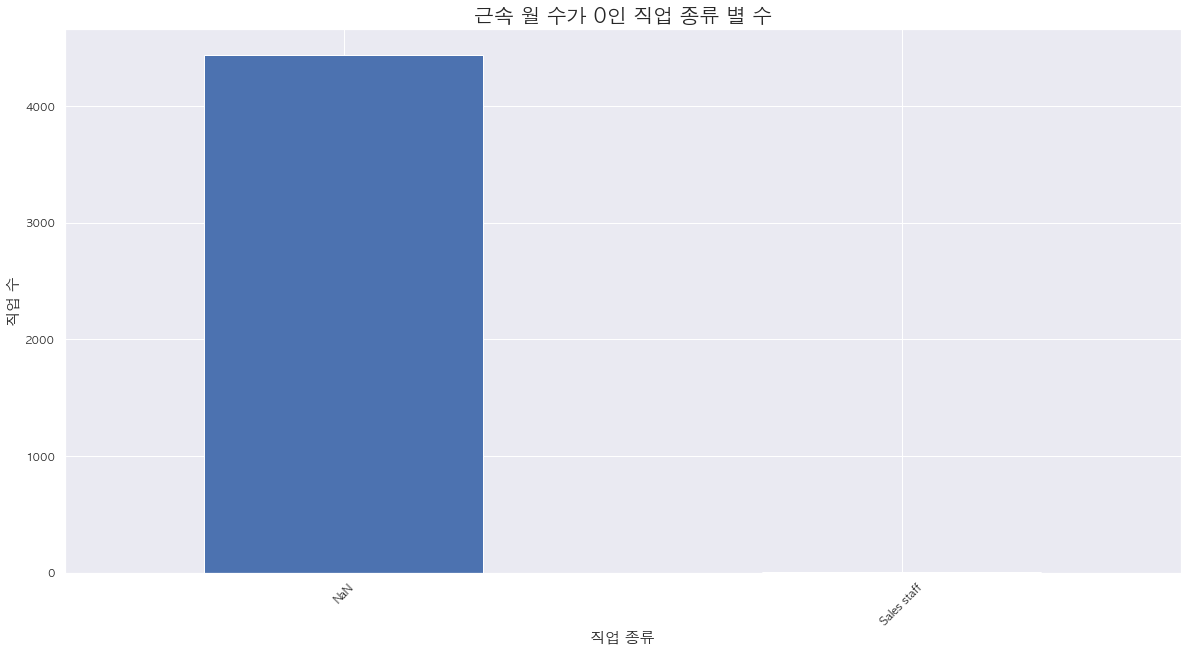

In [70]:
df2 = df[(df['근속월수'] == 0)]
ot = df2.groupby('occyp_type').count()['index']
plot = ot.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('직업 종류',fontsize=15)
plot.set_ylabel('직업 수',fontsize=15)
plot.set_title('근속 월 수가 0인 직업 종류 별 수',fontsize=20)
plot.set_xticklabels(labels=ot.index,rotation=45)

In [84]:
df = df.fillna({'occyp_type':'No job'})

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

<AxesSubplot:xlabel='count', ylabel='occyp_type'>

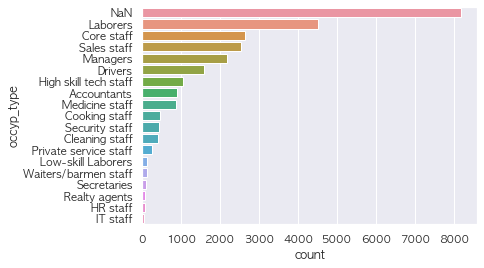

In [8]:
sns.countplot(y = 'occyp_type', data = df, order = df['occyp_type'].value_counts().index)

In [9]:
credit_0 = df.loc[(df['credit'] == 0)]
credit_1 = df.loc[(df['credit'] == 1)]
credit_2 = df.loc[(df['credit'] == 2)]

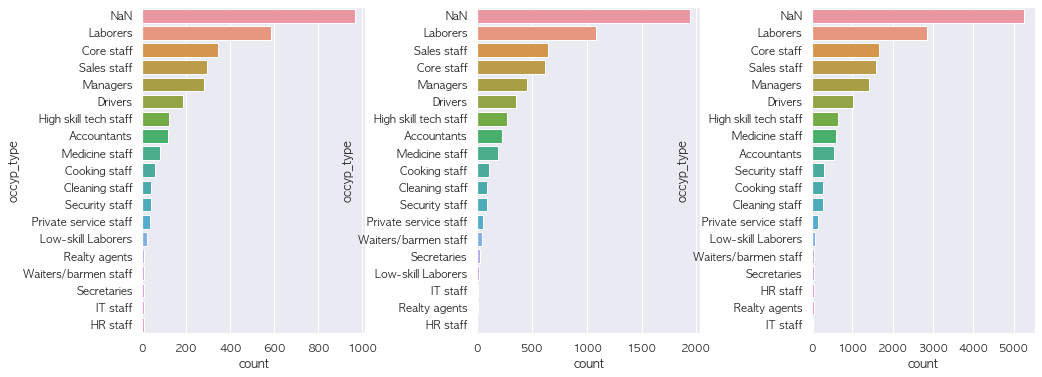

In [10]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.countplot(y = 'occyp_type', data = credit_0, order = credit_0['occyp_type'].value_counts().index, ax=ax[0])
sns.countplot(y = 'occyp_type', data = credit_1, order = credit_1['occyp_type'].value_counts().index, ax=ax[1])
sns.countplot(y = 'occyp_type', data = credit_2, order = credit_2['occyp_type'].value_counts().index, ax=ax[2])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

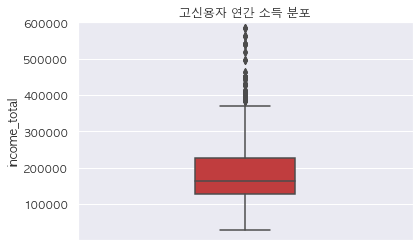

In [230]:
sns.boxplot(data=credit_0,y="income_total", width=0.3, color='tab:red')
plt.title('고신용자 연간 소득 분포')
plt.ylim(1000, 600000)
plt.show()

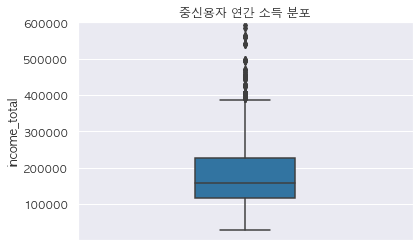

In [231]:
sns.boxplot(data=credit_1,y="income_total", width=0.3, color='tab:blue')
plt.title('중신용자 연간 소득 분포')
plt.ylim(1000, 600000)
plt.show()

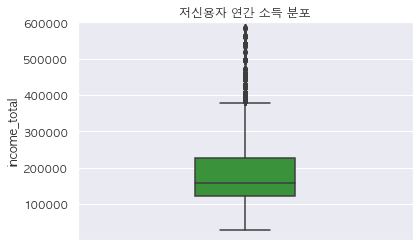

In [232]:
sns.boxplot(data=credit_2,y="income_total", width=0.3, color='tab:green')
plt.title('저신용자 연간 소득 분포')
plt.ylim(1000, 600000)
plt.show()

In [157]:
occyp_type_list = df['occyp_type'].unique().tolist()

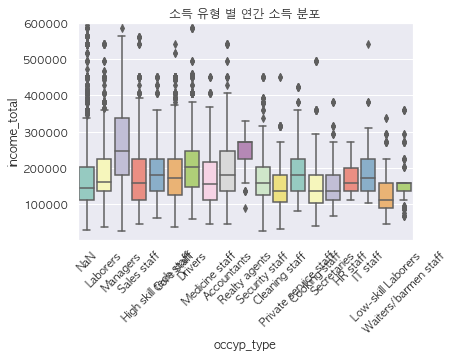

In [233]:
sns.boxplot(y='income_total',x='occyp_type',palette='Set3',data=df)
plt.xticks(rotation = 45)
plt.title('소득 유형 별 연간 소득 분포')
plt.ylim(1000, 600000)
plt.show()

In [159]:
for i in occyp_type_list:
    a = []
    aaaa = df.loc[(df['occyp_type'] == i)]
    print(f'{i}직업의 평균 소득은 {round(aaaa["income_total"].mean(), 2)}입니다.')
    a.append(round(aaaa["income_total"].mean(), 2))


No job직업의 평균 소득은 169174.36입니다.
Laborers직업의 평균 소득은 180307.19입니다.
Managers직업의 평균 소득은 278735.25입니다.
Sales staff직업의 평균 소득은 174955.58입니다.
High skill tech staff직업의 평균 소득은 196602.4입니다.
Core staff직업의 평균 소득은 191473.63입니다.
Drivers직업의 평균 소득은 210853.71입니다.
Medicine staff직업의 평균 소득은 167212.36입니다.
Accountants직업의 평균 소득은 204651.94입니다.
Realty agents직업의 평균 소득은 246357.14입니다.
Security staff직업의 평균 소득은 180252.59입니다.
Cleaning staff직업의 평균 소득은 148209.68입니다.
Private service staff직업의 평균 소득은 198018.52입니다.
Cooking staff직업의 평균 소득은 146275.6입니다.
Secretaries직업의 평균 소득은 163716.49입니다.
HR staff직업의 평균 소득은 186387.1입니다.
IT staff직업의 평균 소득은 196770.73입니다.
Low-skill Laborers직업의 평균 소득은 135708.66입니다.
Waiters/barmen staff직업의 평균 소득은 159822.58입니다.


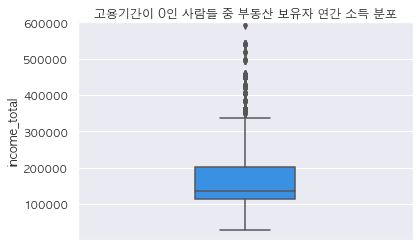

In [29]:
No_job_reality_Y = df.loc[(df['근속연수'] == 0)]
No_job_reality_N = df.loc[(df['reality'] == 'N') & (df['occyp_type'] == 'NaN')]
No_job_reality_Y
sns.boxplot(data=No_job_reality_Y,y="income_total", width=0.3, color='dodgerblue')
plt.title('고용기간이 0인 사람들 중 부동산 보유자 연간 소득 분포')
plt.ylim(1000, 600000)
plt.show()

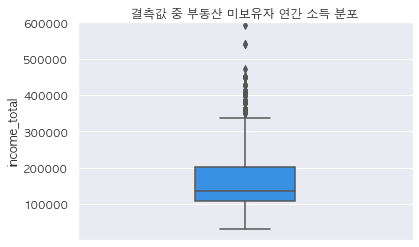

In [238]:
sns.boxplot(data=No_job_reality_N,y="income_total", width=0.3, color='dodgerblue')
plt.title('결측값 중 부동산 미보유자 연간 소득 분포')
plt.ylim(1000, 600000)
plt.show()

In [89]:
df['근속연수'] = df['DAYS_EMPLOYED'] // 365 # 근속연수
df['근속월수'] = df['DAYS_EMPLOYED'] // 30 # 근속월수
df['임용 월'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12) # 고용된 달 
df['임용 주'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4) # 고용된 주
df["고용전 날 수"] = df["DAYS_BIRTH"] - df["DAYS_EMPLOYED"]

df_test['근속연수'] = df_test['DAYS_EMPLOYED'] // 365 # 근속연수
df_test['근속월수'] = df_test['DAYS_EMPLOYED'] // 30 # 근속월수
df_test['임용 월'] = np.floor(df_test['DAYS_EMPLOYED'] / 30) - ((np.floor(df_test['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12) # 고용된 달 
df_test['임용 주'] = np.floor(df_test['DAYS_EMPLOYED'] / 7) - ((np.floor(df_test['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4) # 고용된 주
df_test["고용전 날 수"] = df_test["DAYS_BIRTH"] - df_test["DAYS_EMPLOYED"]

In [90]:
df['고용비율'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'] # 인생 살면서 일한 비율
df['인당 평균 부양비'] = df['income_total'] / df['family_size'] 

df_test['고용비율'] = df_test['DAYS_EMPLOYED'] / df_test['DAYS_BIRTH'] # 인생 살면서 일한 비율
df_test['인당 평균 부양비'] = df_test['income_total'] / df_test['family_size'] 

In [91]:
df_test['연봉'] = df_test['income_total'] / (df_test['근속연수'])
df_test['연봉'] = df_test['income_total'] / (df_test['근속연수'])

In [92]:
df = df[(df['family_size'] <= 7)]
df = df.reset_index(drop=True)

df_test = df_test[(df_test['family_size'] <= 7)]
df_test = df_test.reset_index(drop=True)

In [93]:
df = df.drop(['index'], axis = 1)
df_test = df_test.drop(['index'], axis = 1)

In [96]:
df["자녀 제외 가족 구성원 수"] = df["family_size"] - df["child_num"]
df_test["자녀 제외 가족 구성원 수"] = df_test["family_size"] - df_test["child_num"]

In [97]:
df_test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,new_age,근속연수,근속월수,임용 월,임용 주,고용전 날 수,고용비율,인당 평균 부양비,연봉,자녀 제외 가족 구성원 수
0,M,Y,N,0,112500.00,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,21990,0,0,1,0,NaN,2.00,60.00,60,0,0,0.00,0.00,21990,0.00,56250.00,inf,2.00
1,F,N,Y,0,135000.00,State servant,Higher education,Married,House / apartment,18964,8671,0,1,0,Core staff,2.00,36.00,52,23,289,1.00,2.00,10293,0.46,67500.00,5869.57,2.00
2,F,N,Y,0,69372.00,Working,Secondary / secondary special,Married,House / apartment,15887,217,1,1,0,Laborers,2.00,40.00,43,0,7,7.00,3.00,15670,0.01,34686.00,inf,2.00
3,M,Y,N,0,112500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,19270,2531,1,0,0,Drivers,2.00,41.00,53,6,84,0.00,1.00,16739,0.13,56250.00,18750.00,2.00
4,F,Y,Y,0,225000.00,State servant,Higher education,Married,House / apartment,17822,9385,1,0,0,Managers,2.00,8.00,49,25,312,0.00,0.00,8437,0.53,112500.00,9000.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Y,Y,0,202500.00,Working,Incomplete higher,Married,House / apartment,18593,5434,1,1,0,Accountants,2.00,19.00,51,14,181,1.00,0.00,13159,0.29,101250.00,14464.29,2.00
9996,M,Y,Y,0,202500.00,Working,Secondary / secondary special,Civil marriage,House / apartment,10886,1315,1,0,0,Laborers,2.00,34.00,30,3,43,7.00,3.00,9571,0.12,101250.00,67500.00,2.00
9997,F,N,Y,0,292500.00,Working,Secondary / secondary special,Married,House / apartment,21016,14018,0,0,0,Medicine staff,2.00,55.00,57,38,467,11.00,2.00,6998,0.67,146250.00,7697.37,2.00
9998,F,Y,N,0,180000.00,Commercial associate,Secondary / secondary special,Married,House / apartment,16541,1085,0,1,0,NaN,2.00,33.00,45,2,36,0.00,3.00,15456,0.07,90000.00,90000.00,2.00


In [53]:
df.to_csv("train_data.csv")

In [98]:
df_test.to_csv("test_df.csv")

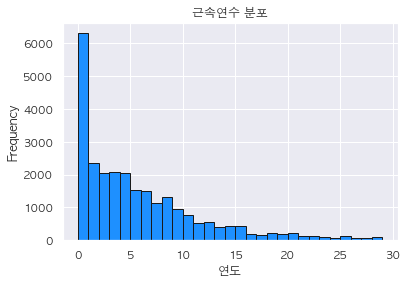

In [262]:
df['EMPLOYED'].plot.hist(bins=range(0,30,1),color='dodgerblue', edgecolor='k')
plt.xlabel('연도')
plt.title('근속연수 분포')
plt.show()

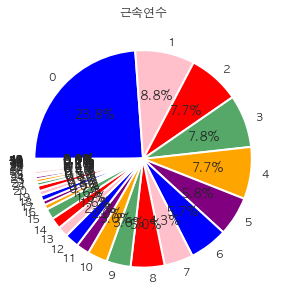

In [252]:
df1= df.groupby('EMPLOYED').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('근속연수')
plt.show()

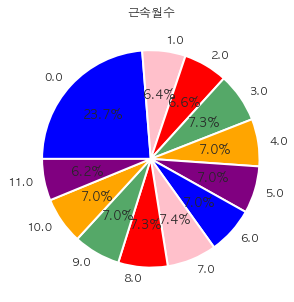

In [257]:
df1= df.groupby('DAYS_EMPLOYED_m').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('근속월수')
plt.show()

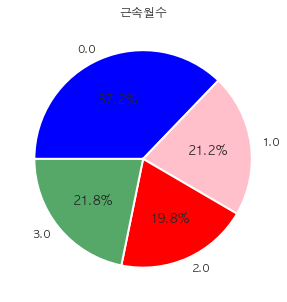

In [258]:
df1= df.groupby('DAYS_EMPLOYED_w').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['blue','pink', 'red', 'g', 'orange', 'purple'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'linewidth':2})
plt.title('근속월수')
plt.show()

TypeError: barh() got multiple values for argument 'width'

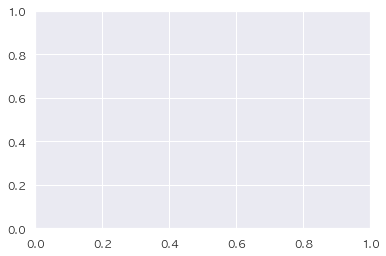

In [14]:
df2 = df[(df['근속연수'] == 0)]
sns.countplot(data=df2,y="occyp_type", width=0.3, color='dodgerblue')
plt.title('고용되지 않은 상태의 사람들의 소득분포')
plt.ylim(1000, 600000)
plt.show()

In [ ]:
df2 = df[(df['occyp_type'] == 'NaN') & (df['근속연수'] == 0)]
df2

In [49]:
def int_EDA(data):
  for i in data.columns:
    if data[i].dtypes != 'O':
      group_data = data.groupby([i],as_index=False).count()
      
      plt.figure(figsize=(15,8))
      plt.subplot(1,2,1)
      sns.distplot(data,x=data[i],bins=20)
      plt.title('%s histogram'%i)

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

ValueError: supplied range of [1455.8823529411766, inf] is not finite

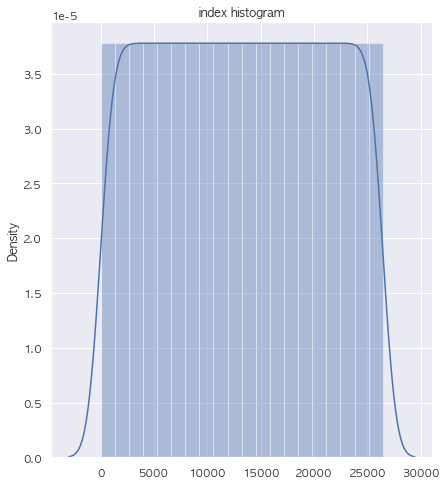

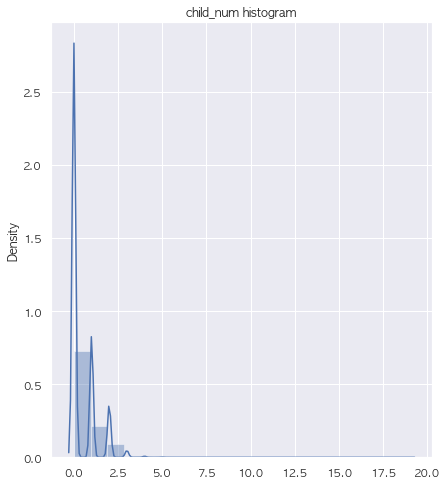

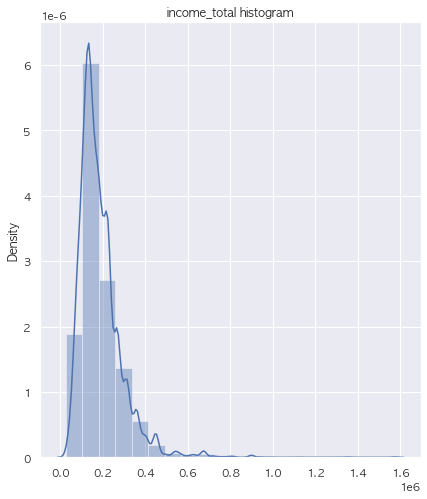

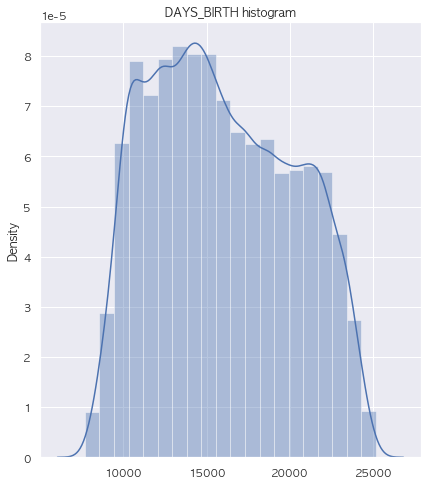

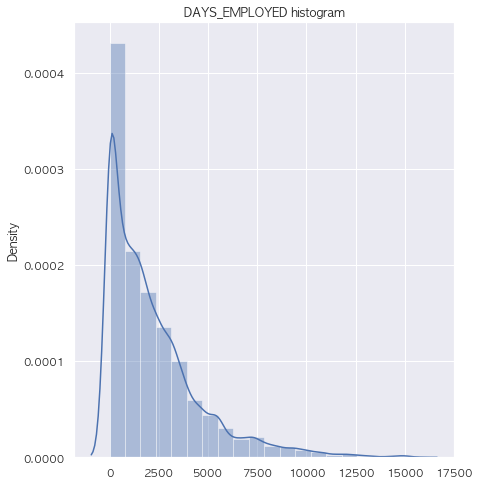

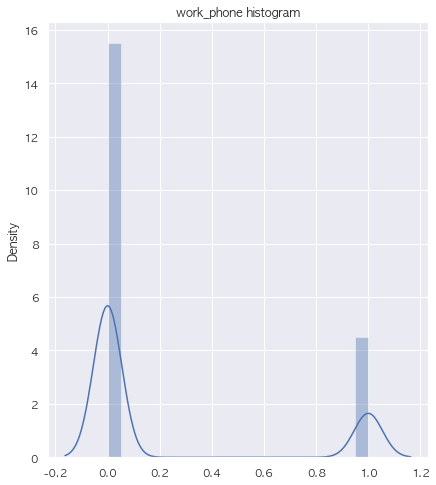

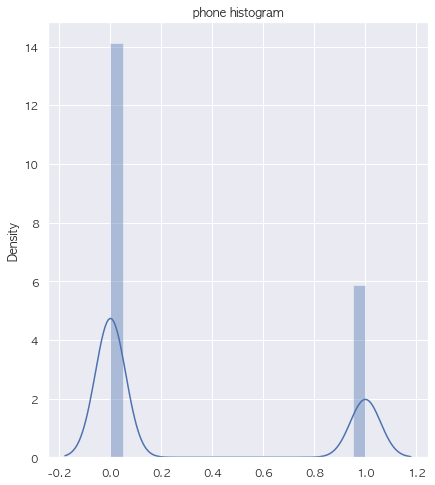

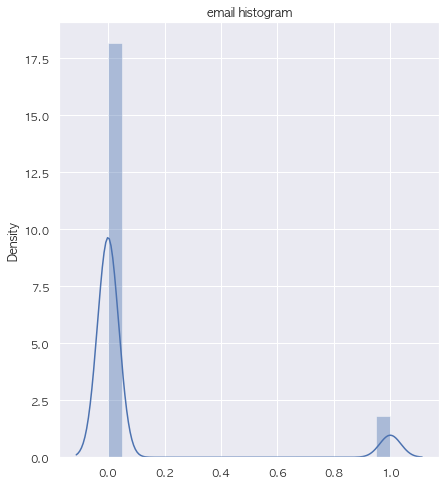

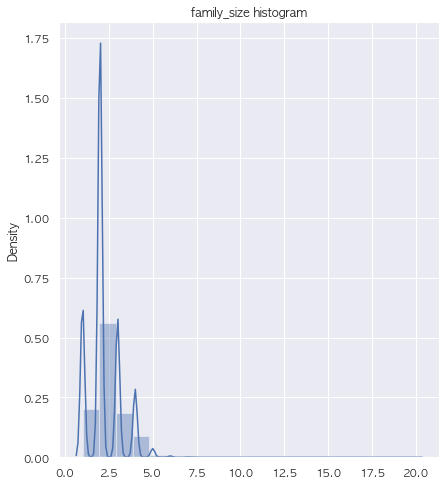

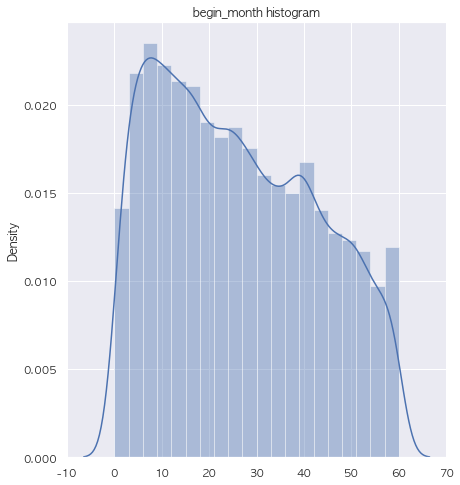

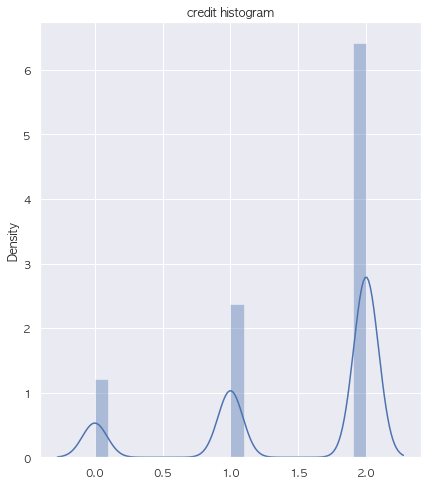

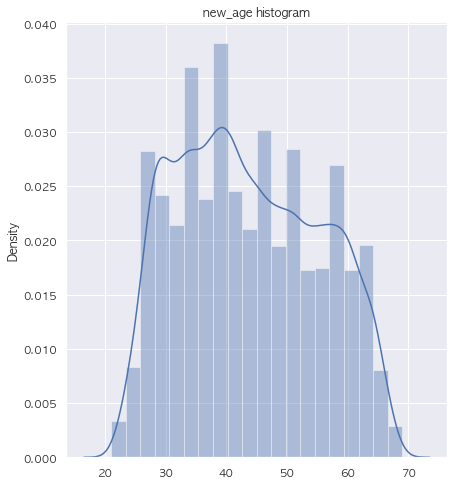

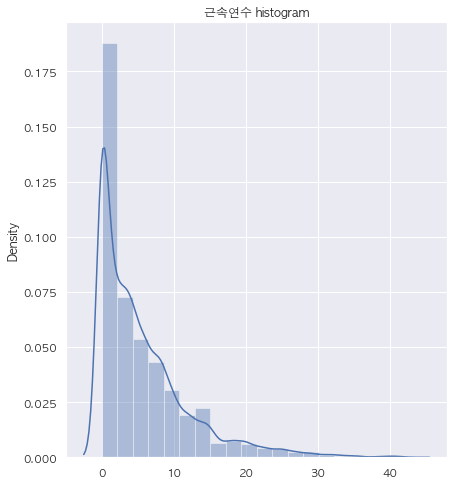

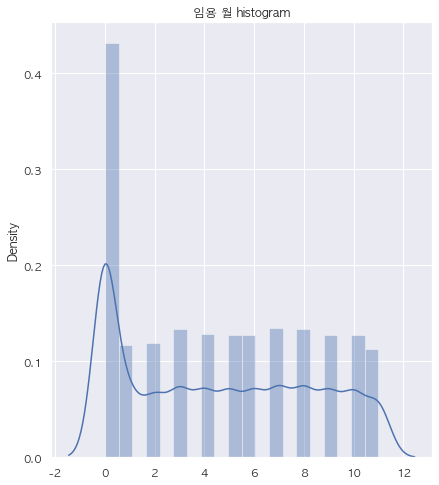

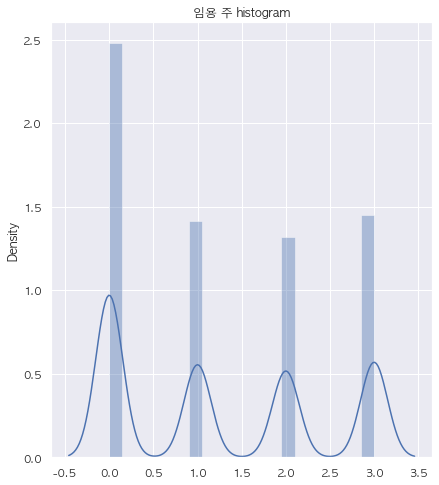

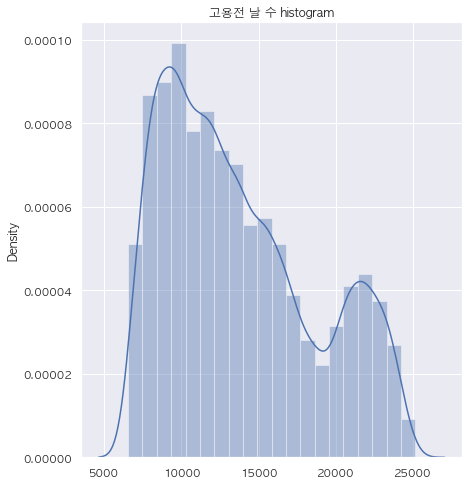

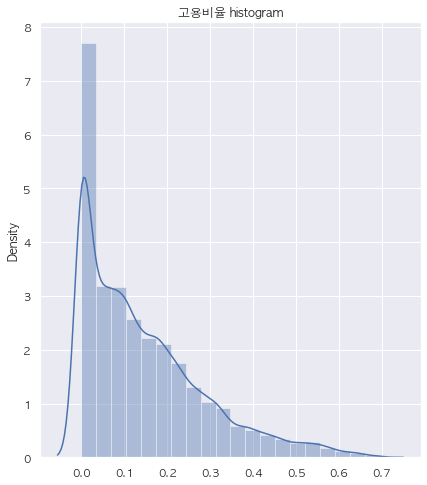

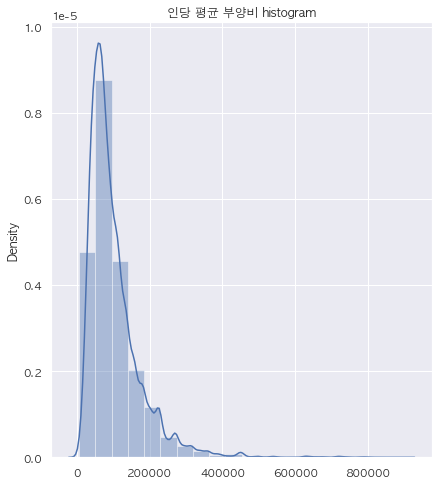

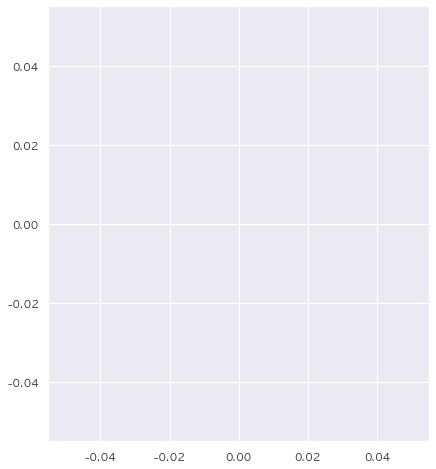

In [50]:
int_EDA(df)